# Diagramas de frecuencia para variables continuas y discretas

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [2]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [3]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

## Frecuencias categóricas

In [16]:
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x))) #Conversión a variable categórica
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [17]:
valores, conteo_freq = np.unique(ycat, return_counts=True)

valores, conteo_freq


(array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object),
 array([4394, 4387, 4303, 4330]))

In [40]:
tabla_frecuencias = dict(zip(valores, conteo_freq
))

tabla_frecuencias 

{0: 4394, 25: 4387, 50: 4303, 75: 4330}

## Frecuencias variable numérica

In [20]:
ynum = df['viento'].copy()
ynum


0         6.0
1         5.0
2         0.0
3         0.0
4         6.5
         ... 
17409    19.0
17410    21.0
17411    24.0
17412    23.0
17413    22.0
Name: viento, Length: 17414, dtype: float64

In [30]:
#Valores máximos y mínimos
np.min(ynum), np.max(ynum) 

(0.0, 56.5)

In [31]:
#Percentiles
np.percentile(ynum, q=100)

56.5

In [32]:
np.percentile(ynum, q=0)

0.0

In [33]:
np.percentile(ynum, q=50)

15.0

In [34]:
np.median(ynum)

15.0

In [35]:
#Cuartiles

valores = [0, 25, 50, 75, 100]
np.percentile(ynum, q=valores)


array([ 0. , 10. , 15. , 20.5, 56.5])

In [41]:
#Quintiles

valores_quintiles = [0, 20, 40, 60, 80, 100]
np.percentile(ynum, q=valores_quintiles)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [42]:
#Deciles

valores_deciles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
np.percentile(ynum, q=valores_deciles)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [72]:
#Acceder a valores estadísticos rápidos.

y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [63]:
#Cálculo de Outliers

Q1 = np.percentile(ynum, q=25)
Q3 = np.percentile(ynum, q=75)

RI = Q3 - Q1
lim_inf = Q1 - (1.5 * RI)
lim_sup = Q3 + (1.5 * RI)

[lim_inf, lim_sup]

[-5.75, 36.25]

In [53]:
#Graficando histograma

import matplotlib.pyplot as plt

%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <BarContainer object of 10 artists>)

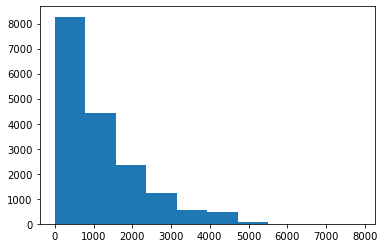

In [62]:
plt.hist(y)